# Twitter Sentiment Analysis

## Dataset information
The objective of this task is to detect hate speech in tweets.
For training the models, we provide a dataset of 100 tweets. This dataset is provided in the form of a csv file with each line storing a tweet and user id.

## Importing libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from textblob import TextBlob


## Load the dataset

In [34]:
df = pd.read_csv('twitter sentiments.csv')
df.head()

,text,user
0,RT @ItsMose: This account will NEVER NEVER tol...,1
1,RT @neblitweets: yall hate outspoken people bc...,2
2,RT @ZachWLambert: When people say it’s “divisi...,3
3,@VorheesMonster Hey had the put extra hot sauc...,4
4,RT @neblitweets: yall hate outspoken people bc...,5


## Preprocessing the dataset

In [35]:
#removing the words that dont come under re
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word,' ',input_txt)
    return input_txt
df.head()

,text,user
0,RT @ItsMose: This account will NEVER NEVER tol...,1
1,RT @neblitweets: yall hate outspoken people bc...,2
2,RT @ZachWLambert: When people say it’s “divisi...,3
3,@VorheesMonster Hey had the put extra hot sauc...,4
4,RT @neblitweets: yall hate outspoken people bc...,5


In [36]:
#removing the twitter handle from the tweet (@users)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'],"@[\w]*")

In [37]:
df.head()

,text,user,clean_tweet
0,RT @ItsMose: This account will NEVER NEVER tol...,1,RT : This account will NEVER NEVER tolerate r...
1,RT @neblitweets: yall hate outspoken people bc...,2,RT : yall hate outspoken people bc they confr...
2,RT @ZachWLambert: When people say it’s “divisi...,3,RT : When people say it’s “divisive” to talk ...
3,@VorheesMonster Hey had the put extra hot sauc...,4,Hey had the put extra hot sauce on it cause ...
4,RT @neblitweets: yall hate outspoken people bc...,5,RT : yall hate outspoken people bc they confr...


In [38]:
#removing speacial characters,numbers,punctuaions
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,text,user,clean_tweet
0,RT @ItsMose: This account will NEVER NEVER tol...,1,RT This account will NEVER NEVER tolerate r...
1,RT @neblitweets: yall hate outspoken people bc...,2,RT yall hate outspoken people bc they confr...
2,RT @ZachWLambert: When people say it’s “divisi...,3,RT When people say it s divisive to talk ...
3,@VorheesMonster Hey had the put extra hot sauc...,4,Hey had the put extra hot sauce on it cause ...
4,RT @neblitweets: yall hate outspoken people bc...,5,RT yall hate outspoken people bc they confr...


In [39]:
#removing short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,text,user,clean_tweet
0,RT @ItsMose: This account will NEVER NEVER tol...,1,This account will NEVER NEVER tolerate racism ...
1,RT @neblitweets: yall hate outspoken people bc...,2,yall hate outspoken people they confront make ...
2,RT @ZachWLambert: When people say it’s “divisi...,3,When people divisive talk about about racism s...
3,@VorheesMonster Hey had the put extra hot sauc...,4,extra sauce cause homophobia transphobia sexis...
4,RT @neblitweets: yall hate outspoken people bc...,5,yall hate outspoken people they confront make ...


## Exploratory Data Analysis

In [40]:
#visualise the most occuring words

all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

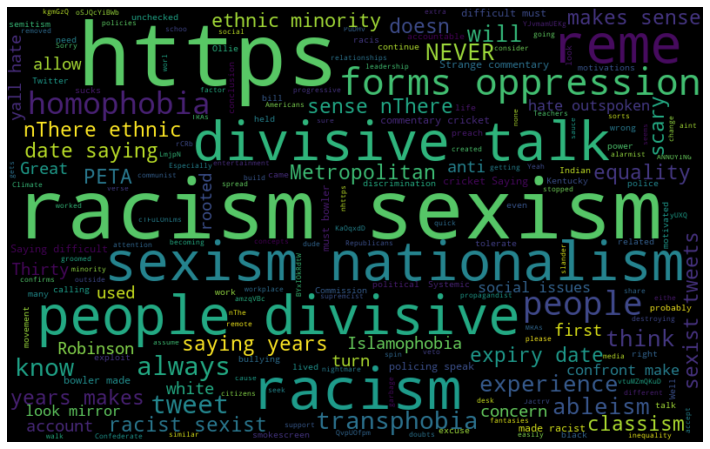

In [41]:
#plot the graph {i.e., the wordcloud only}
 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [43]:
#create a new function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [44]:
#create a new function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [45]:
#create two new columns in the dataframe clean tweets
df['subjectivity'] = df['clean_tweet'].apply(getsubjectivity)
df['polarity'] = df['clean_tweet'].apply(getpolarity)

In [46]:
df.head()

,text,user,clean_tweet,subjectivity,polarity
0,RT @ItsMose: This account will NEVER NEVER tol...,1,This account will NEVER NEVER tolerate racism ...,0.000,0.000
1,RT @neblitweets: yall hate outspoken people bc...,2,yall hate outspoken people they confront make ...,0.900,-0.800
2,RT @ZachWLambert: When people say it’s “divisi...,3,When people divisive talk about about racism s...,0.375,-0.125
3,@VorheesMonster Hey had the put extra hot sauc...,4,extra sauce cause homophobia transphobia sexis...,0.100,0.000
4,RT @neblitweets: yall hate outspoken people bc...,5,yall hate outspoken people they confront make ...,0.900,-0.800


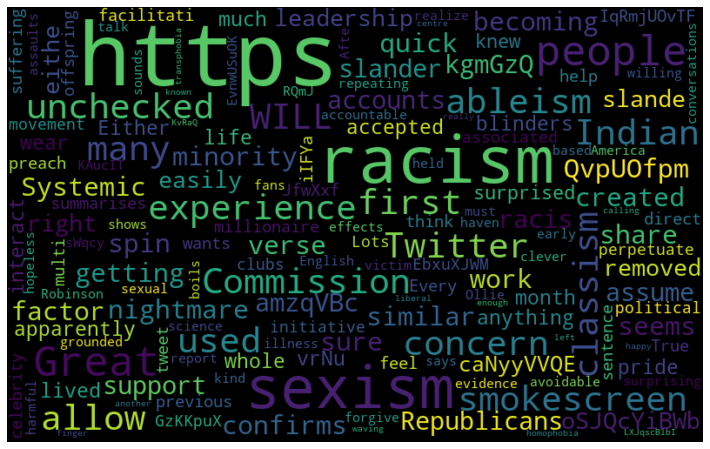

In [47]:
# frequent +ve words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['polarity']>0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

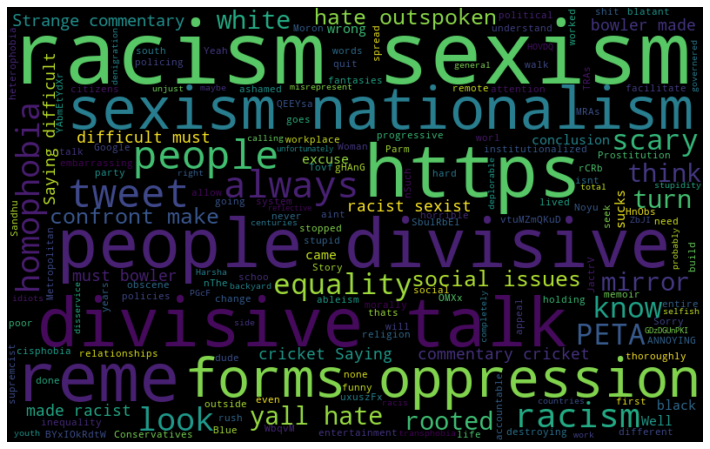

In [48]:
# frequent -ve words
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['polarity']<0]])
wordcloud = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

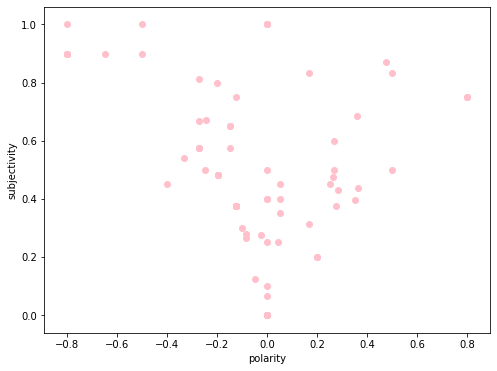

In [49]:
#scatter plot of subjectity vs polarity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['subjectivity'][i], color = "pink")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [50]:
#add a new column "analysis"
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'negative'
df['analysis'] = df['polarity'].apply(getanalysis)

In [51]:
df.head()

,text,user,clean_tweet,subjectivity,polarity,analysis
0,RT @ItsMose: This account will NEVER NEVER tol...,1,This account will NEVER NEVER tolerate racism ...,0.000,0.000,neutral
1,RT @neblitweets: yall hate outspoken people bc...,2,yall hate outspoken people they confront make ...,0.900,-0.800,negative
2,RT @ZachWLambert: When people say it’s “divisi...,3,When people divisive talk about about racism s...,0.375,-0.125,negative
3,@VorheesMonster Hey had the put extra hot sauc...,4,extra sauce cause homophobia transphobia sexis...,0.100,0.000,neutral
4,RT @neblitweets: yall hate outspoken people bc...,5,yall hate outspoken people they confront make ...,0.900,-0.800,negative


In [52]:
def getlabel(pol):
    if pol<=0:
        return 0
    else:
        return 1
df['label'] = df['polarity'].apply(getlabel)
df.head()

,text,user,clean_tweet,subjectivity,polarity,analysis,label
0,RT @ItsMose: This account will NEVER NEVER tol...,1,This account will NEVER NEVER tolerate racism ...,0.000,0.000,neutral,0
1,RT @neblitweets: yall hate outspoken people bc...,2,yall hate outspoken people they confront make ...,0.900,-0.800,negative,0
2,RT @ZachWLambert: When people say it’s “divisi...,3,When people divisive talk about about racism s...,0.375,-0.125,negative,0
3,@VorheesMonster Hey had the put extra hot sauc...,4,extra sauce cause homophobia transphobia sexis...,0.100,0.000,neutral,0
4,RT @neblitweets: yall hate outspoken people bc...,5,yall hate outspoken people they confront make ...,0.900,-0.800,negative,0


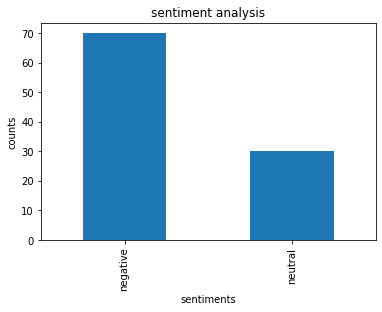

In [53]:
#plot bar graph showing +ve _ve and neutral tweets
df['analysis'].value_counts()
plt.title("sentiment analysis")
plt.xlabel('sentiments')
plt.ylabel('counts')
df['analysis'].value_counts().plot(kind='bar')

## Input split
input split for testing and training the model

In [54]:
#feautre extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [55]:
#bow[0].toarray()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,df['label'],random_state=42,test_size=0.25)

## Model Training

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [57]:
#training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#testing
pred = model.predict(x_test)
f1_score(y_test,pred)

0.0

In [59]:
accuracy_score(y_test,pred)

0.84